Python Assignment 3: Using Different models on a same database to compare results. 

In [65]:
# data processing
import pandas as pd
import numpy as np
import scipy.stats as stats

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

# grid search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [66]:
#Loading the Data
df_heart = pd.read_csv("https://raw.githubusercontent.com/Alvin-Hoyeong-Kim/ClassWork/main/Python/Data/heart.csv")
df_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [67]:
#split data into training and test sets
train, test = train_test_split(df_heart, test_size=0.3, random_state=321)

#view results to check sets add to 918
train.shape, test.shape

((642, 12), (276, 12))

In [68]:
# Dummies for train set
train_d = pd.get_dummies(data=train, 
                         columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

train_d

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
354,55,120,0,0,92,0.3,1,0,1,1,...,0,0,0,0,1,1,0,0,0,1
403,52,135,0,1,128,2.0,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
448,63,160,230,1,105,1.0,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
780,64,180,325,0,154,0.0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
134,61,130,294,0,120,1.0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,58,100,234,0,156,0.1,1,0,1,1,...,0,0,0,1,0,1,0,0,0,1
809,48,124,255,1,175,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
799,53,130,246,1,173,0.0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
124,58,130,230,0,150,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1


Number 3

In [69]:
#calculate z scores for the training set
z_train = stats.zscore(train_d)

#view training z scores
z_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
354,0.170237,-0.672217,-1.821098,-0.540139,-1.775811,-0.533290,0.927831,-0.511172,0.511172,0.919145,...,-0.501460,-0.236476,-0.520852,-1.264591,2.199173,0.770099,-0.770099,-0.287456,-0.960289,1.119210
403,-0.149642,0.146896,-1.821098,1.851374,-0.358009,1.014257,0.927831,-0.511172,0.511172,0.919145,...,-0.501460,-0.236476,-0.520852,0.790770,-0.454716,-1.298535,1.298535,-0.287456,1.041353,-0.893487
448,1.023247,1.512083,0.309032,1.851374,-1.263827,0.103935,0.927831,-0.511172,0.511172,0.919145,...,-0.501460,-0.236476,-0.520852,0.790770,-0.454716,-1.298535,1.298535,-0.287456,1.041353,-0.893487
780,1.129873,2.604233,1.188868,-0.540139,0.665960,-0.806386,-1.077783,1.956289,-1.956289,0.919145,...,-0.501460,-0.236476,-0.520852,0.790770,-0.454716,-1.298535,1.298535,-0.287456,-0.960289,1.119210
134,0.809994,-0.126142,0.901764,-0.540139,-0.673076,0.103935,-1.077783,1.956289,-1.956289,0.919145,...,-0.501460,-0.236476,-0.520852,-1.264591,2.199173,-1.298535,1.298535,-0.287456,1.041353,-0.893487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,0.490116,-1.764366,0.346078,-0.540139,0.744726,-0.715354,0.927831,-0.511172,0.511172,0.919145,...,-0.501460,-0.236476,-0.520852,0.790770,-0.454716,0.770099,-0.770099,-0.287456,-0.960289,1.119210
809,-0.576147,-0.453787,0.540568,1.851374,1.493011,-0.806386,-1.077783,-0.511172,0.511172,-1.087968,...,1.994178,-0.236476,-0.520852,0.790770,-0.454716,0.770099,-0.770099,-0.287456,-0.960289,1.119210
799,-0.043016,-0.126142,0.457215,1.851374,1.414244,-0.806386,-1.077783,-0.511172,0.511172,-1.087968,...,1.994178,-0.236476,1.919930,-1.264591,-0.454716,0.770099,-0.770099,-0.287456,-0.960289,1.119210
124,0.490116,-0.126142,0.309032,-0.540139,0.508426,-0.806386,-1.077783,-0.511172,0.511172,-1.087968,...,-0.501460,-0.236476,-0.520852,0.790770,-0.454716,0.770099,-0.770099,-0.287456,-0.960289,1.119210


In [70]:
#create binary flags for test set
dummies_test = pd.get_dummies(data=test, 
                              columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

#view new test set
dummies_test
#create dependent variable
target = 'HeartDisease'

#set training group 
y_train = train_d[target]
X_train = train_d.drop(target, axis = 1)

#set test group
y_test = dummies_test[target]
X_test = dummies_test.drop(target, axis = 1)

#check shape to validate data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((642, 20), (642,), (276, 20), (276,))

In [71]:
#Assigning our Training variables to a variable to call upon later.
X = X_train
y = y_train

In [72]:
#using four different models Log Regression,Decision Tree, Gradient boost, and random forest 
logit = LogisticRegression(max_iter=1000, random_state=314)
tree = DecisionTreeClassifier(random_state=314)
forest = RandomForestClassifier(n_estimators=50, random_state=314)
gboost = GradientBoostingClassifier(n_estimators=50, random_state=314)

In [73]:
models = [logit, tree, forest, gboost]

for model in models:
    model.fit(X, y)

In [74]:
# logit
logit_scores_train = logit.predict_proba(X_train)[:, 1]
logit_scores_test = logit.predict_proba(X_test)[:, 1]

# decision tree
tree_scores_train = tree.predict_proba(X_train)[:, 1]
tree_scores_test = tree.predict_proba(X_test)[:, 1]

# random forest
forest_scores_train = forest.predict_proba(X_train)[:, 1]
forest_scores_test = forest.predict_proba(X_test)[:, 1]

# gradient boost
gboost_scores_train = gboost.predict_proba(X_train)[:, 1]
gboost_scores_test = gboost.predict_proba(X_test)[:, 1]

In [75]:
# calculate the false positive and true positive rates
logit_fpr_train, logit_tpr_train, _ = roc_curve(y_train, logit_scores_train)
logit_fpr_test, logit_tpr_test, _ = roc_curve(y_test, logit_scores_test)

tree_fpr_train, tree_tpr_train, _ = roc_curve(y_train, tree_scores_train)
tree_fpr_test, tree_tpr_test, _ = roc_curve(y_test, tree_scores_test)

forest_fpr_train, forest_tpr_train, _ = roc_curve(y_train, forest_scores_train)
forest_fpr_test, forest_tpr_test, _ = roc_curve(y_test, forest_scores_test)

gboost_fpr_train, gboost_tpr_train, _ = roc_curve(y_train, gboost_scores_train)
gboost_fpr_test, gboost_tpr_test, _ = roc_curve(y_test, gboost_scores_test)

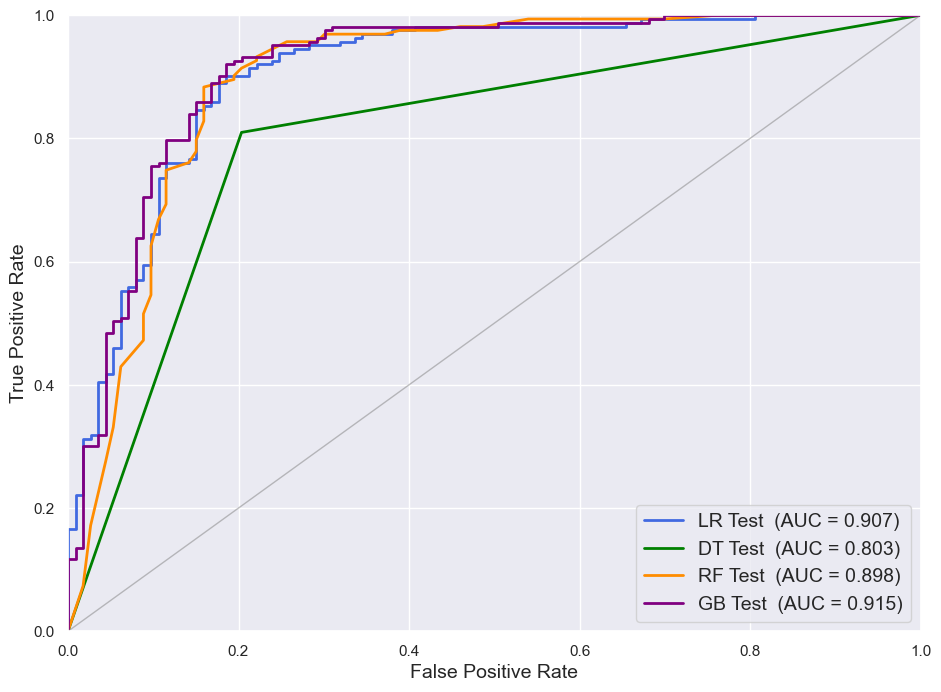

In [76]:
#Plotting the result of pretuned data
sns.set(style='darkgrid')
plt.figure(figsize=(11, 8))

plt.plot(logit_fpr_test, logit_tpr_test, color='royalblue', lw=2,
         label=f'LR Test  (AUC = {roc_auc_score(y_test, logit_scores_test):0.3f})')

plt.plot(tree_fpr_test, tree_tpr_test, color='green', lw=2,
         label=f'DT Test  (AUC = {roc_auc_score(y_test, tree_scores_test):0.3f})')

plt.plot(forest_fpr_test, forest_tpr_test, color='darkorange', lw=2,
         label=f'RF Test  (AUC = {roc_auc_score(y_test, forest_scores_test):0.3f})')

plt.plot(gboost_fpr_test, gboost_tpr_test, color='purple', lw=2,
         label=f'GB Test  (AUC = {roc_auc_score(y_test, gboost_scores_test):0.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, alpha=.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc="lower right", fontsize=14);

In [77]:
# create a list of all parameters we want to test
param_grid = {'max_depth': [4, 5, 6], 'min_samples_leaf': [0.05, 0.03, 0.02]}

# define the gridsearch object
tree_gs = GridSearchCV(tree, param_grid, cv=3, verbose=2, n_jobs=-1)

# fit the model
tree_gs.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=314),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6],
                         'min_samples_leaf': [0.05, 0.03, 0.02]},
             verbose=2)

In [78]:
#using different parametrs to give us the best result.
forest2 = RandomForestClassifier(random_state=314)

param_grid = {'n_estimators': [200, 300], 
              'max_depth': [3, 6],
              'min_samples_leaf': [0.02, 0.05],
              'bootstrap': [True, False]}

forest_gs = RandomizedSearchCV(forest2, param_grid, cv=3, verbose=2, n_iter=10,
                               n_jobs=-1, random_state=314)

forest_gs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=314),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 6],
                                        'min_samples_leaf': [0.02, 0.05],
                                        'n_estimators': [200, 300]},
                   random_state=314, verbose=2)

In [79]:
gboost_opt = GradientBoostingClassifier(random_state=314)

param_grid = {'n_estimators': [100, 300, 500], 
              'learning_rate': [0.05, 0.1],
              'max_depth': [3, 6],
              'min_samples_leaf': [0.01, 0.02, 0.05]}

gboost_opt_rs = RandomizedSearchCV(gboost_opt, param_grid, cv=3, n_iter=10, n_jobs=-1, random_state=314)

gboost_opt_rs.fit(X_train, y_train)

print ('Best GBM Parameters:', gboost_opt_rs.best_params_)

Best GBM Parameters: {'n_estimators': 300, 'min_samples_leaf': 0.01, 'max_depth': 3, 'learning_rate': 0.05}


In [80]:
tree_opt1 = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.02, random_state=314)
forest_opt1 = RandomForestClassifier(n_estimators=300, min_samples_leaf=0.02, max_depth=6, bootstrap=True, random_state=314)
gboost_opt1 = GradientBoostingClassifier(n_estimators=100, min_samples_leaf=0.02, max_depth=3, learning_rate=0.1, random_state=314)

In [81]:
# Fit newly optimized models using a for loop
models2 = [tree_opt1, forest_opt1, gboost_opt1]
for model in models2:
    model.fit(X_train, y_train)
# make predictions on the test data
lr_ypreds = logit.predict(X_test)
dt_ypreds = tree_opt1.predict(X_test)
rf_ypreds = forest_opt1.predict(X_test)
gb_ypreds = gboost_opt1.predict(X_test)

# confusion matrix
lr_cfm = confusion_matrix(y_test, lr_ypreds)
dt_cfm = confusion_matrix(y_test, dt_ypreds)
rf_cfm = confusion_matrix(y_test, rf_ypreds)
gb_cfm = confusion_matrix(y_test, gb_ypreds)

In [82]:
#Showing  confusion matrix as well as the log loss to detemrine the best model.
for model in models2:
    print(pd.crosstab(y_test, model.predict(X_test)))
    print(log_loss(y_test,model.predict(X_test))) 

print("Random Forest Classifier seems to be the best!")

col_0          0    1
HeartDisease         
0             86   27
1             23  140
6.257102930710686
col_0          0    1
HeartDisease         
0             84   29
1             11  152
5.0057037830503734
col_0          0    1
HeartDisease         
0             90   23
1             14  149
4.630264917944166
Random Forest Classifier seems to be the best!


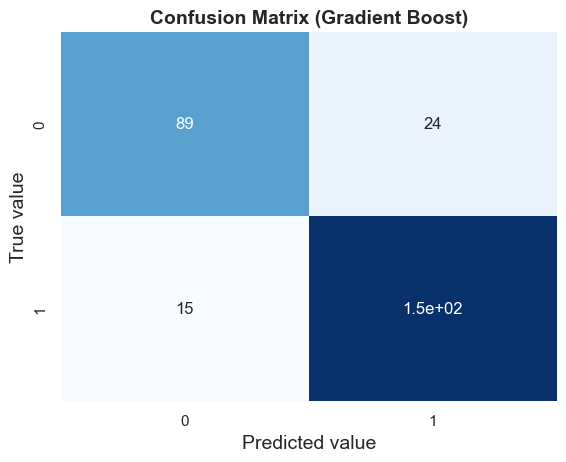

In [83]:

sns.heatmap(lr_cfm, annot=True, cbar=False, cmap='Blues')
plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('True value', fontsize=14)
plt.title('Confusion Matrix (Gradient Boost)', fontsize=14, weight='semibold');

    

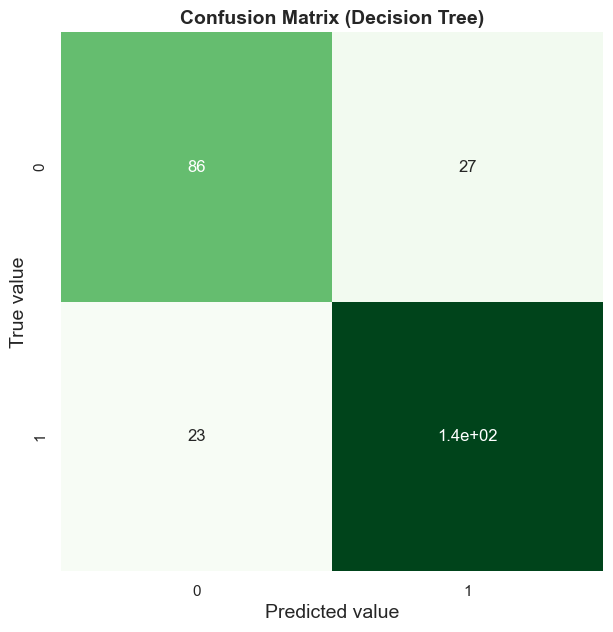

In [84]:
plt.figure(figsize=(7, 7))

sns.heatmap(dt_cfm, annot=True, cbar=False, cmap='Greens')
plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('True value', fontsize=14)
plt.title('Confusion Matrix (Decision Tree)', fontsize=14, weight='semibold');

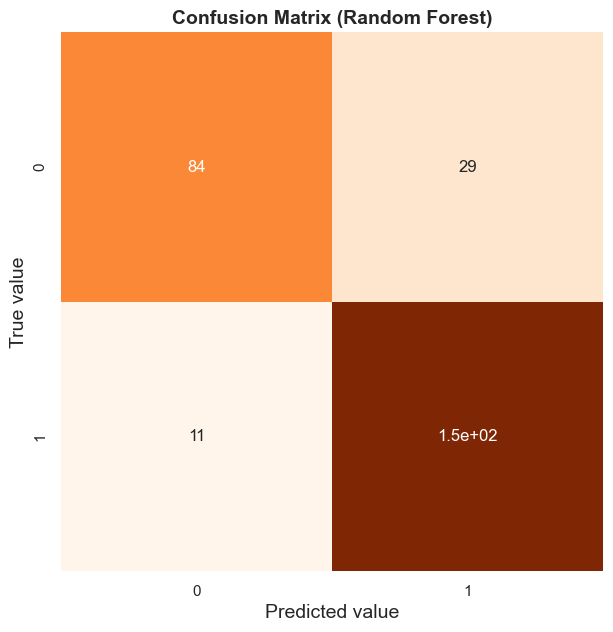

In [85]:
plt.figure(figsize=(7, 7))

sns.heatmap(rf_cfm, annot=True, cbar=False, cmap='Oranges')
plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('True value', fontsize=14)
plt.title('Confusion Matrix (Random Forest)', fontsize=14, weight='semibold');

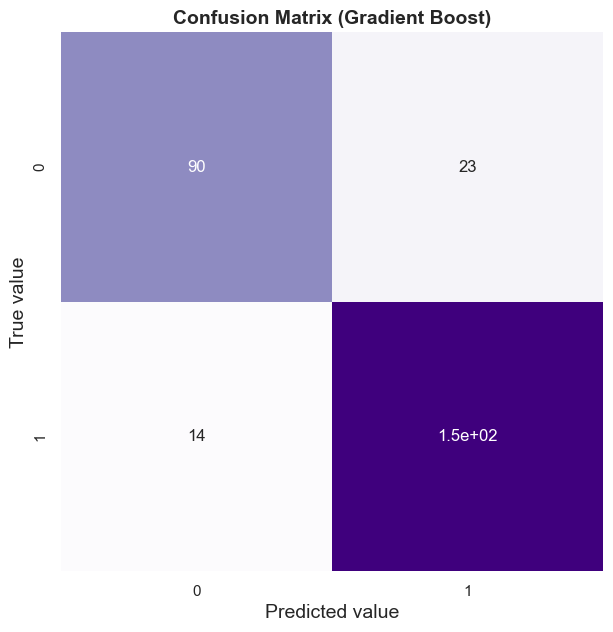

In [86]:
plt.figure(figsize=(7, 7))

sns.heatmap(gb_cfm, annot=True, cbar=False, cmap='Purples')
plt.xlabel('Predicted value', fontsize=14)
plt.ylabel('True value', fontsize=14)
plt.title('Confusion Matrix (Gradient Boost)', fontsize=14, weight='semibold');

In [87]:
from sklearn.metrics import log_loss

print(f'LR log loss: {log_loss(y_test, lr_ypreds)}')
print(f'DT log loss: {log_loss(y_test, dt_ypreds)}')
print(f'RF log loss: {log_loss(y_test, rf_ypreds)}')
print(f'GB log loss: {log_loss(y_test, gb_ypreds)}')

LR log loss: 4.880548803405223
DT log loss: 6.257102930710686
RF log loss: 5.0057037830503734
GB log loss: 4.630264917944166


It is fascinating to see that in this case, the gradient boosting  did the best in the AUC score.


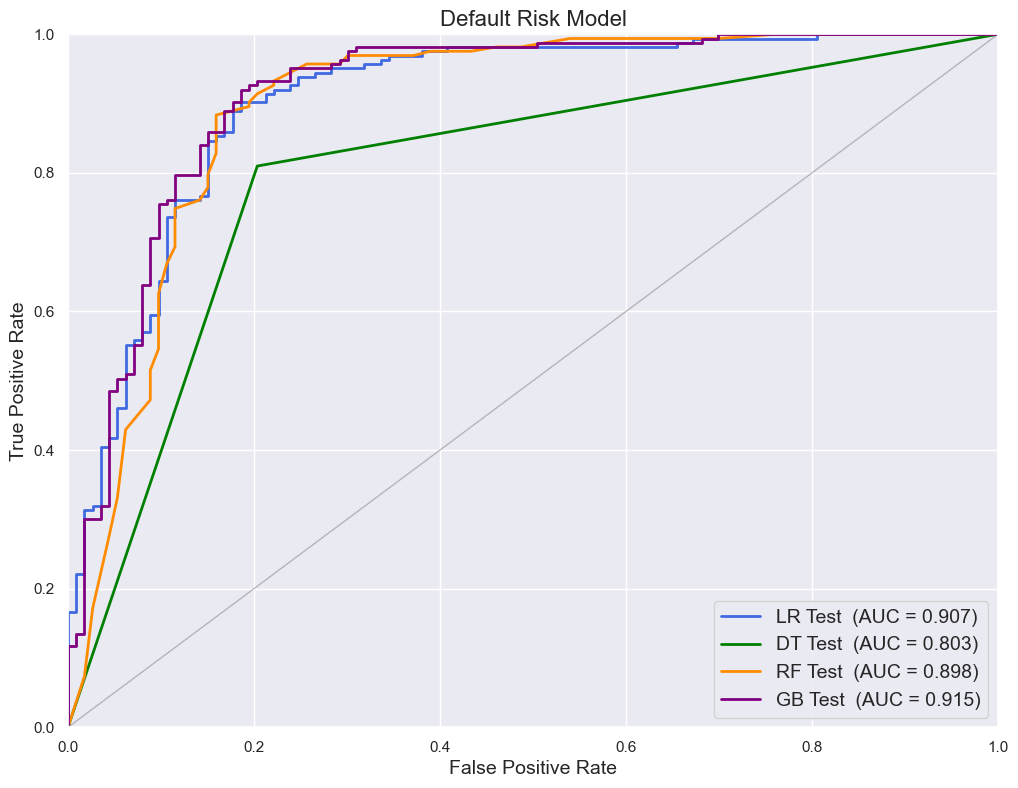

In [88]:
#Plotting the same graphs but with optimized parameters.
plt.figure(figsize=(12, 9))

plt.plot(logit_fpr_test, logit_tpr_test, color='royalblue', lw=2,
         label=f'LR Test  (AUC = {roc_auc_score(y_test, logit_scores_test):0.3f})')

plt.plot(tree_fpr_test, tree_tpr_test, color='green', lw=2,
         label=f'DT Test  (AUC = {roc_auc_score(y_test, tree_scores_test):0.3f})')

plt.plot(forest_fpr_test, forest_tpr_test, color='darkorange', lw=2,
         label=f'RF Test  (AUC = {roc_auc_score(y_test, forest_scores_test):0.3f})')

plt.plot(gboost_fpr_test, gboost_tpr_test, color='purple', lw=2,
         label=f'GB Test  (AUC = {roc_auc_score(y_test, gboost_scores_test):0.3f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, alpha=.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Default Risk Model', fontsize=16)
plt.legend(loc="lower right", fontsize=14);
print("It is fascinating to see that in this case, the gradient boosting  did the best in the AUC score.")

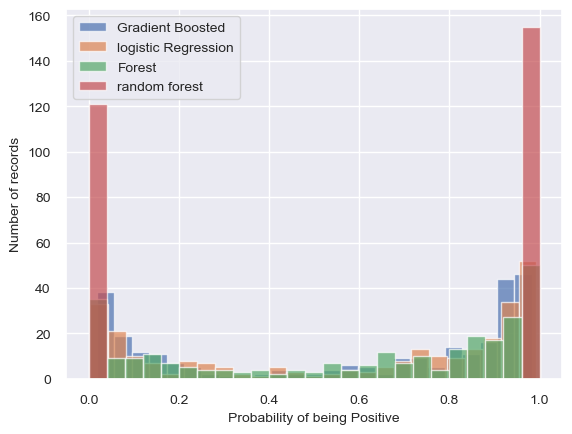

In [89]:
#Plot histogram of the different models to show the probabilty of being positive. 
plt.hist(gboost_scores_test , bins=25, alpha=0.7, label = 'Gradient Boosted')
plt.hist(logit_scores_test,  bins=25 , alpha=0.7,label = 'logistic Regression')
plt.hist(forest_scores_test,  bins=25, alpha=0.7, label = 'Forest' )
plt.hist(tree_scores_test,  bins=25, alpha=0.7,label = "random forest")

plt.legend(fontsize=10)
plt.xlabel('Probability of being Positive', fontsize=10)
plt.ylabel('Number of records', fontsize=10)
plt.tick_params(axis='both', labelsize=10, pad=5)
plt.show() 

In [90]:
#for model in models:
matrix = df_heart.corr().fillna(0)
print(matrix)

print("This is the correlation matrix of the data")

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  
This is the correlation matrix of the data
